In [259]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [260]:
df = pd.read_csv("Lead Scoring Assignment/Leads.csv")
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Basic Data Exploration

In [261]:
df.shape

(9240, 37)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [263]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [264]:
#checking for null values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [265]:
#checking for duplicated values
df.duplicated().sum()

0

### Performing Data Cleaning

In [266]:
# there are many values with 'Select' which needs to be replaced
df = df.replace('Select', np.nan)

In [267]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [268]:
# Finding the null values in terms of percentages across columns
round(df.isnull().sum()/len(df), 2) * 100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [269]:
#now we have learned that cols with missing values percentage >= 40 can be dropped
df = df.drop(columns=['Asymmetrique Activity Index', 'How did you hear about X Education',
                      'Asymmetrique Profile Index', 'Lead Profile', 'Lead Quality', 'Asymmetrique Activity Score',
                      'Asymmetrique Profile Score'])

In [270]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [271]:
round(df.isnull().sum()/len(df), 2) * 100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

### Still there are cols with missing values percentage close to 40%. Lets fix them first

#### City column with 40% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

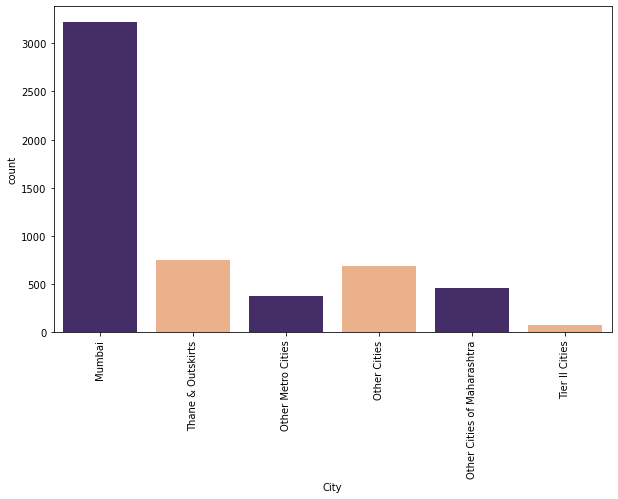

In [272]:
plt.figure(figsize=(10, 6))
sns.countplot(df['City'], palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=90)

In [273]:
round(df['City'].value_counts(normalize=True), 2) * 100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

In [274]:
df['City']=df['City'].replace(np.nan,'Mumbai')

In [275]:
round(df['City'].value_counts(normalize=True), 2) * 100

Mumbai                         75.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: City, dtype: float64

#### Tags column with 36% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

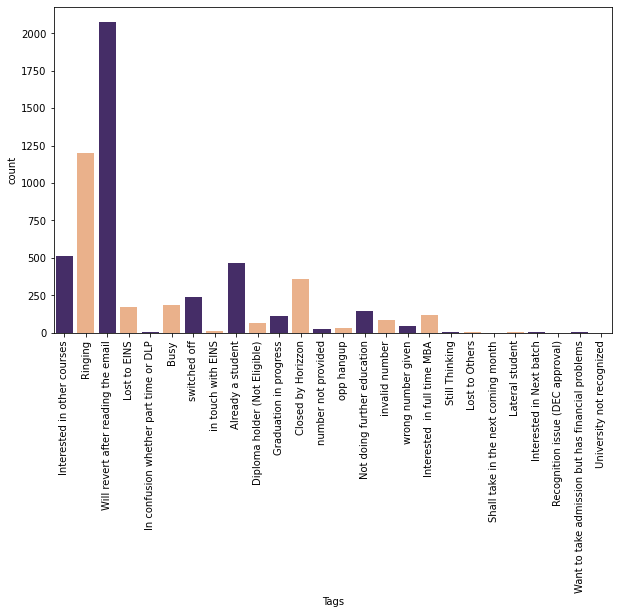

In [276]:
plt.figure(figsize = (10, 6))
sns.countplot(df['Tags'], palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=90)

In [277]:
# we have approx 2000 values with value 3, so we will replace missing values with it as mode
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

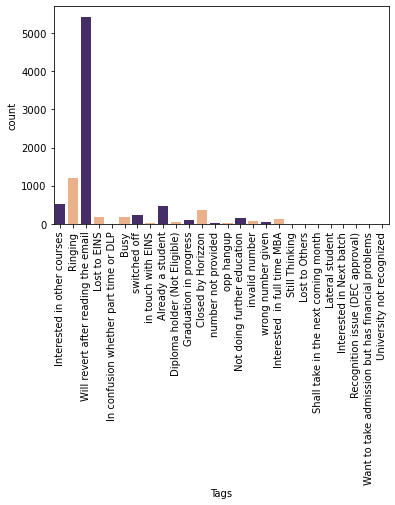

In [278]:
sns.countplot(df['Tags'], palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=90)

### Specialization Column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

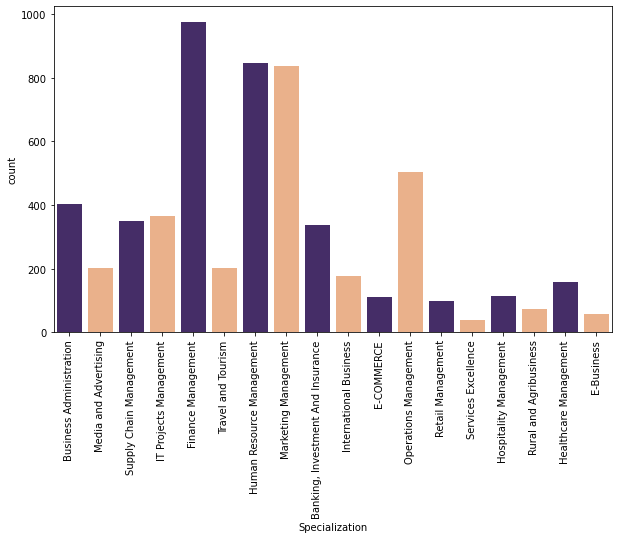

In [279]:
# specialization has a pretty much high % i.e 37
plt.figure(figsize=(10, 6))
sns.countplot(df['Specialization'],palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

In [280]:
#as the user can be a client with no prior expertise, we can put them under a new category
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
round(df['Specialization'].isnull().sum()/len(df['Specialization']), 2)*100

0.0

### 'What matters most to you in choosing a course' column

<AxesSubplot:xlabel='What matters most to you in choosing a course', ylabel='count'>

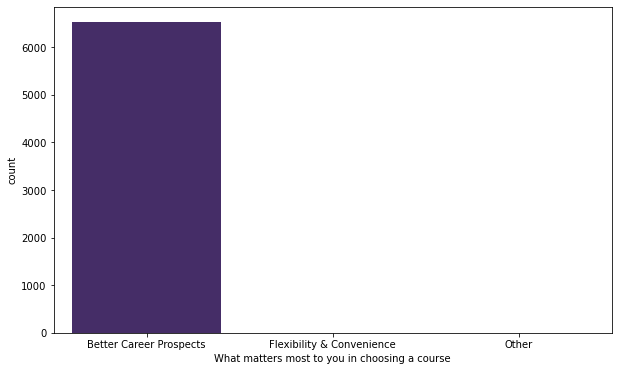

In [281]:
# column 'What matters most to you in choosing a course' also has 29% missing values
plt.figure(figsize=(10, 6))
sns.countplot(df['What matters most to you in choosing a course'], palette=['#432371',"#FAAE7B"])

In [282]:
#all the values present have only one option which indicates skewness in the dataset, let's dop this col
df = df.drop('What matters most to you in choosing a course',axis=1)

### 'What is your current occupation' column

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

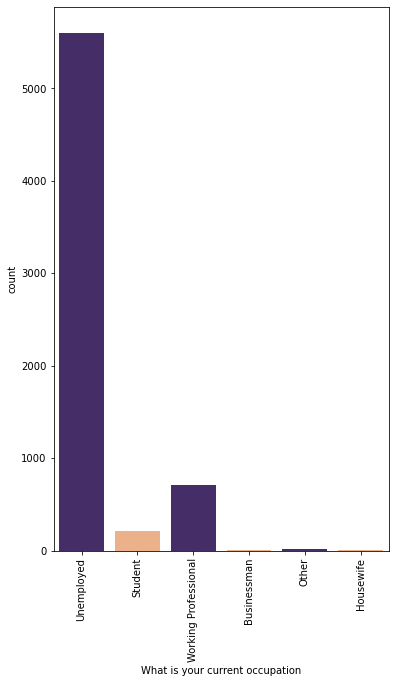

In [283]:
# the column has 29% missing values which is also high
plt.figure(figsize = (6, 10))
sns.countplot(df['What is your current occupation'], palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

In [284]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [285]:
#checking the null values percentage
round(df['What is your current occupation'].isnull().sum()/len(df), 2) * 100

0.0

### 'Country' column which has 27% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

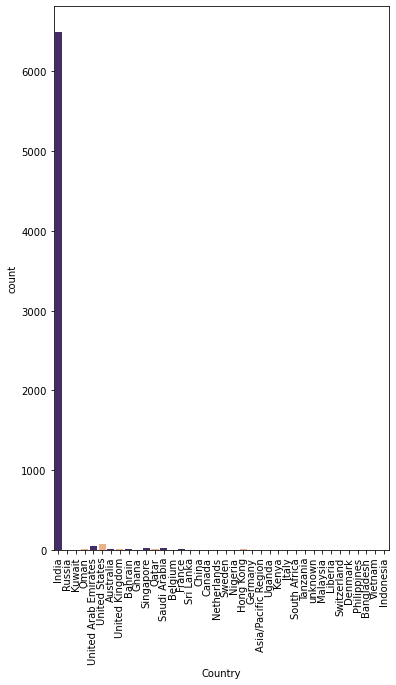

In [286]:
plt.figure(figsize=(6, 10))
sns.countplot(df['Country'],palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=90)

In [287]:
#country is an important column so we cannot drop it but yes we can take the mode as "India"
df['Country'] = df['Country'].replace(np.nan, 'India')

In [288]:
round(df.isnull().sum()/len(df), 2) * 100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [289]:
#dropping rows as they constitute only 1% data
df.dropna(inplace=True)

In [290]:
round(df.isnull().sum()/len(df), 2) * 100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

### Performing analysis using diff columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

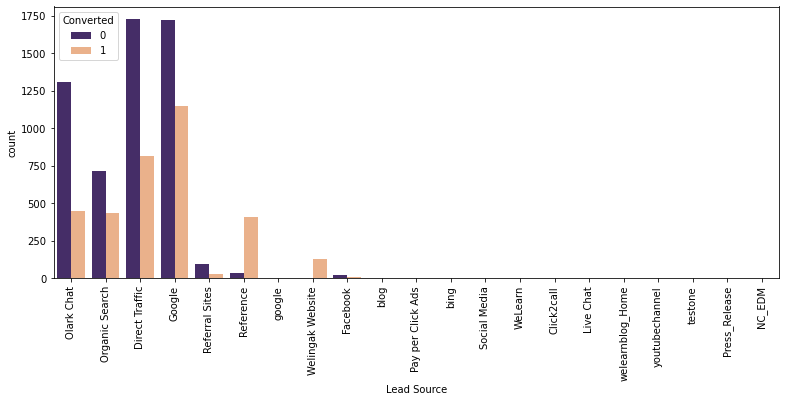

In [291]:
# checking from where most of the lead source comes
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

In [292]:
# grouping values as 'Others'
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'Others')])

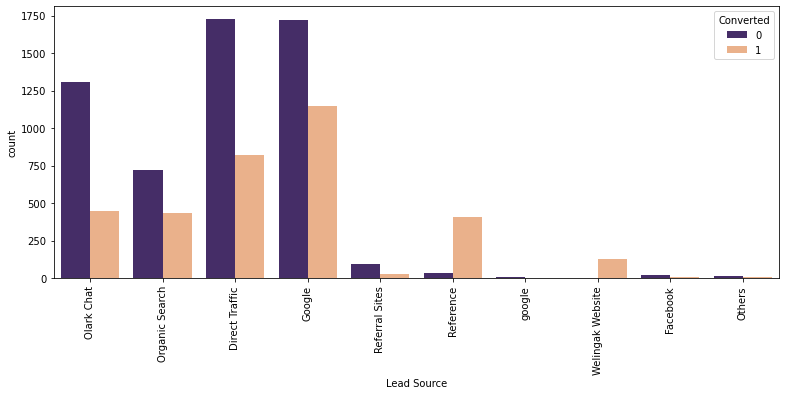

In [293]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

### Results
- Direct leads and leads from Google have roughly same conversion rate
- Olark Chat is also a good source for bringing leads
- Company has leads coming from Organic Search as well which is approx 750 leads

In [294]:
converted_ratio = (sum(df['Converted'])/len(df['Converted'].index)) * 100
converted_ratio

37.85541106458012

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

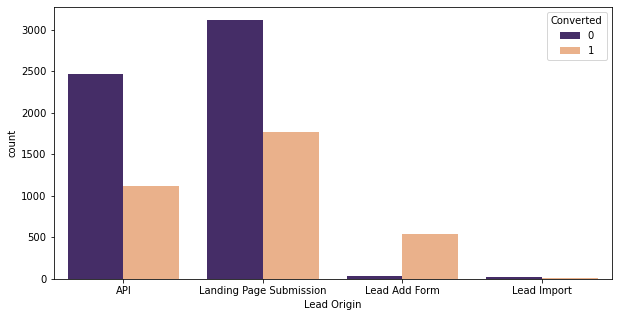

In [295]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])


### Results from this chart
- 'Landing page submission' is the origin for most of the leads
- 'Lead Add Form' and 'Lead Import' does not contribute significantly

### Do not email column

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

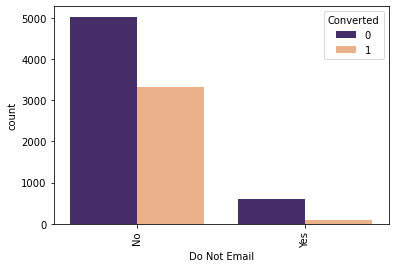

In [296]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

### Result
- It can be inferred that people who opt for email has a high conversion rate

### 'Do Not Call' column

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

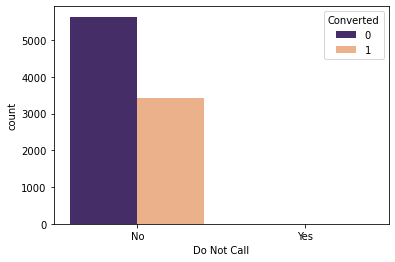

In [297]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='Converted', ylabel='count'>

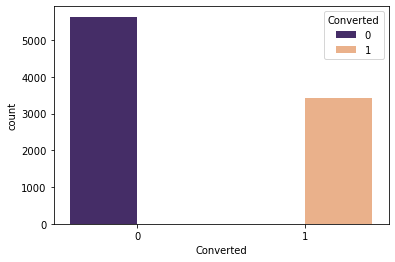

In [298]:
sns.countplot(x = "Converted", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])

### Result
- It can be inferred that people who opt for call has a high conversion rate

### Another key factor can be 'Total time spent on website'

In [299]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

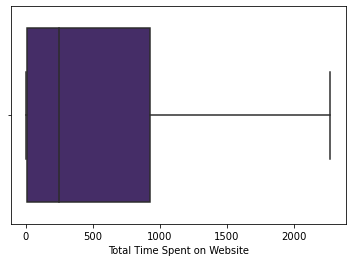

In [300]:
sns.boxplot(df['Total Time Spent on Website'],orient='horizontal',palette=['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

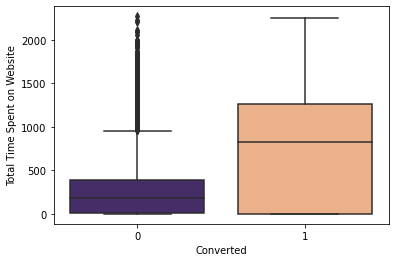

In [301]:
sns.boxplot( x = 'Converted', y = 'Total Time Spent on Website', data = df, palette=['#432371',"#FAAE7B"])

### Inference
- People spending more time on the website are more likely to be converted

### 'Total Visits' column

In [302]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

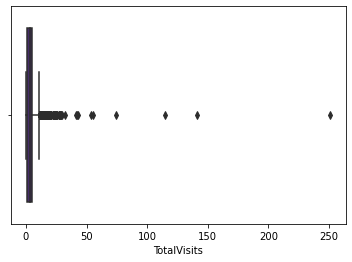

In [303]:
sns.boxplot(df['TotalVisits'],palette=['#432371',"#FAAE7B"])

In [304]:
#there are many outliers present
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

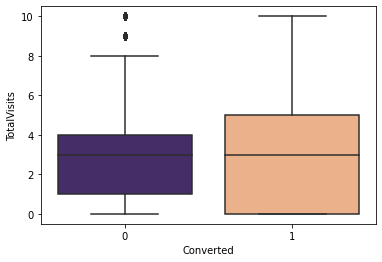

In [305]:
sns.boxplot(x = 'Converted', y ='TotalVisits', data = df, palette=['#432371',"#FAAE7B"])

### Inference
- The median is same for both. Thus nothing can be inferred from this.

### 'Last Activity' column

In [306]:
df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

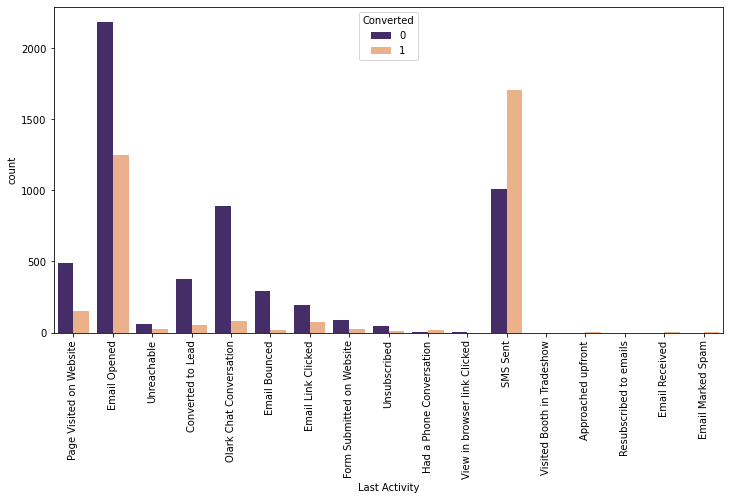

In [307]:
plt.figure(figsize=(12,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

In [308]:
round(df['Last Activity'].value_counts(normalize=True),2)*100

Email Opened                    38.0
SMS Sent                        30.0
Olark Chat Conversation         11.0
Page Visited on Website          7.0
Converted to Lead                5.0
Email Bounced                    3.0
Email Link Clicked               3.0
Form Submitted on Website        1.0
Unreachable                      1.0
Unsubscribed                     1.0
Had a Phone Conversation         0.0
View in browser link Clicked     0.0
Approached upfront               0.0
Email Received                   0.0
Email Marked Spam                0.0
Visited Booth in Tradeshow       0.0
Resubscribed to emails           0.0
Name: Last Activity, dtype: float64

In [309]:
# Let's club together actvities as others which have less value
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

In [310]:
round(df['Last Activity'].value_counts(normalize=True),2)*100

Email Opened                 38.0
SMS Sent                     30.0
Olark Chat Conversation      11.0
Page Visited on Website       7.0
Converted to Lead             5.0
Email Bounced                 3.0
Email Link Clicked            3.0
Form Submitted on Website     1.0
Unreachable                   1.0
Unsubscribed                  1.0
Others                        0.0
Name: Last Activity, dtype: float64

### Inferences
- Most of the leads have opened an email as their last activity.
- Conversion rate for leads with last activity as SMS Sent is also significant

### 'What is your current occupation' column

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

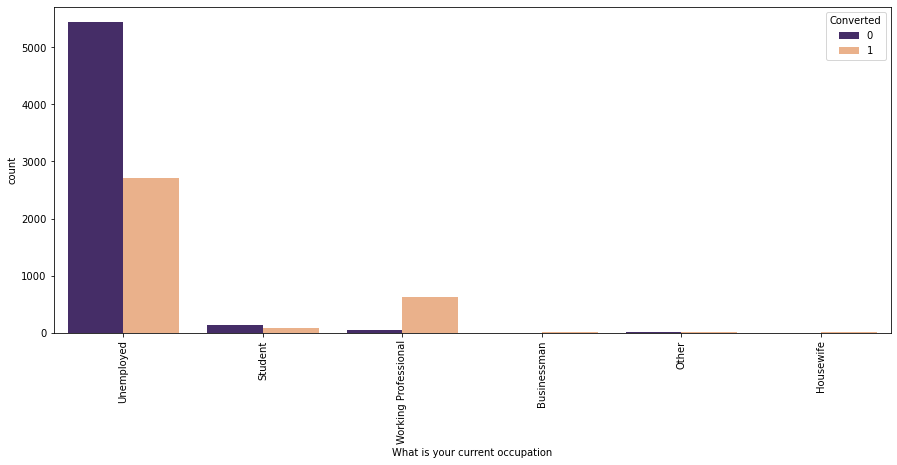

In [311]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

### Inferences
- Most of the leads that are converted as well as not converted are unemployed people
- Leads who are 'Students' have almost 50-50% conversion rate

### 'Magazine' Column

(array([0]), [Text(0, 0, 'No')])

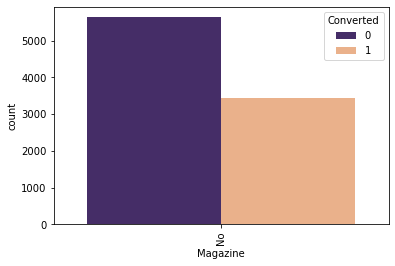

In [312]:
sns.countplot(x = "Magazine", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

### Inferences
- Only 'No' answers are present

### 'Newspaper' Column

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

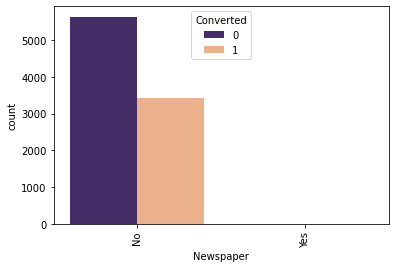

In [313]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df, palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

### Inferences
- Again all values contribute to 'No'. We cannot draw any pattern from it

### 'X Education Forms' Column

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

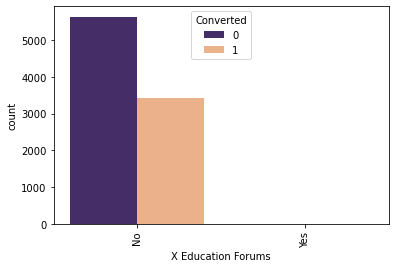

In [314]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df ,palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

### Inferences
- Again almost all answers are 'No'

### 'Receive More Updates About Our Courses¶' Column

(array([0]), [Text(0, 0, 'No')])

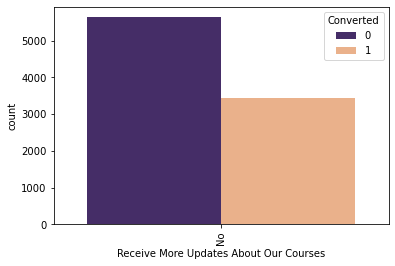

In [315]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df ,palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

### Inferences
- People opting for 'Updates' have a good conversion rate of 35% approx

### 'City' Column

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

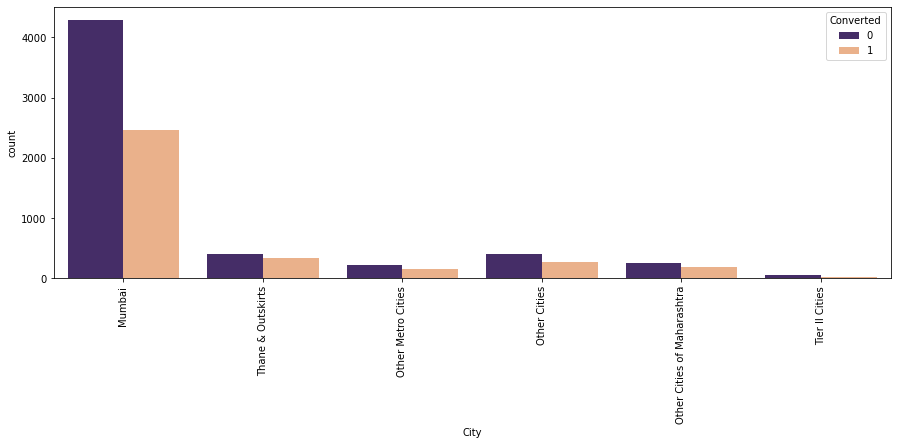

In [316]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = df,palette=['#432371',"#FAAE7B"])
plt.xticks(rotation = 90)

### Inferences
- Most leads were from Mumbai

#### Correlation Matrix to check how different columns are interlinked or related to each other

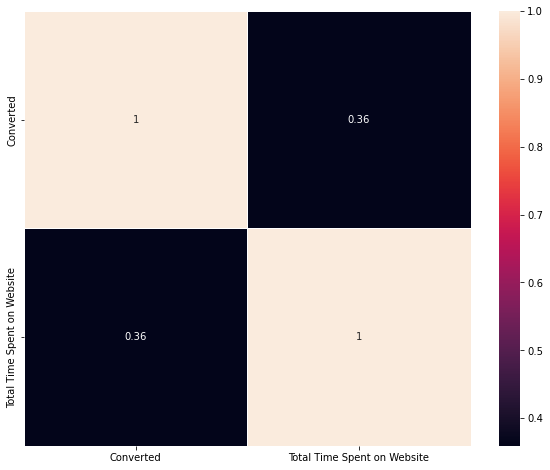

In [317]:
plt.figure(figsize=(10,8))
new_df = df[['Converted', 'Total Time Spent on Website']]
# heatmap
sns.heatmap(new_df.corr(), annot=True, linewidths=0.5)
plt.show()

### Major Inference drawn after performing univariate analysis
- Most of the columns have skewed data
- Most of the columns do not add much information and help us in any way
- It will be better to remove such misleading or unuseful columns

In [318]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [319]:
df = df.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [320]:
df.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,Modified


### Data Manipulation for Modeling
- We need numerical value and not categorical to perform modeling on our dataset. Thus converting this binary values into numerical values

In [321]:
bin_vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[bin_vars] = df[bin_vars].apply(binary_map)

In [322]:
df['Do Not Email'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Do Not Email, dtype: int64

### Using dummy variables
- Now we know there are multiple sources of a lead, in order to visualize them, we will create their dummy variables and drop the original one

In [323]:
dummy_data = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [324]:
df = pd.concat([df, dummy_data], axis=1)
df.head(5)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [325]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

### Data Modeling

In [326]:
from sklearn.model_selection import train_test_split

# creating feature variables
X = df.drop(['Prospect ID', 'Converted'], axis=1)
X.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [327]:
# creating target variable
y = df['Converted']
y.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [328]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [329]:
# now we need to rescale the columns as they have different units on different scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['Total Time Spent on Website', 'TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Now using Recursive Feature Elimination (RFE), we will select columns most suitable for our model

In [330]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [331]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False, False])

In [332]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 26),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 25),
 ('Last Activity_Email Bounced', False, 20),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Form Submitted on Website', False, 36),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Act

In [333]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

### Creating the first model

In [334]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.3
Date:                Thu, 02 May 2024   Deviance:                       5180.6
Time:                        18:43:59   Pearson chi2:                 6.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8338      0.637      1.309      0.190      -0.414       2.082
Do Not Email                                            -1.6759      0.191     -8.796      0.000      -2.049      -1.302
Total Time Spent on Website                              1.1081      0.041     27.194      0.000       1.028       1.188
Lead Origin_Landing Page Submission                     -1.1219      0.130     -8.663      0.000      -1.376      -0.868
Lead Origin_Lead Add Form                                1.6019      0.915      1.751      0.080      -0.191       3.395
Lead Origin_Lead Import                                  0.9059      0.480      1.888      0.059      -0.035       1.846
Lead Source_Olark Chat                                   1.1250      0.124      9.082      0.000       0.882       1.368
Lead Source_Reference                                    1.7697      0.938      1.887      0.059      -0.069       3.608
Lead Source_Welingak Website                             4.2961      1.165      3.687      0.000       2.012       6.580
Last Activity_Olark Chat Conversation                   -0.9504      0.172     -5.531      0.000      -1.287      -0.614
Last Activity_Others                                     1.8717      0.537      3.483      0.000       0.818       2.925
Last Activity_SMS Sent                                   1.3454      0.076     17.766      0.000       1.197       1.494
Last Activity_Unsubscribed                               1.4083      0.483      2.917      0.004       0.462       2.355
Specialization_Others                                   -1.1410      0.126     -9.052      0.000      -1.388      -0.894
What is your current occupation_Housewife               21.7588   1.53e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Student                 -0.5518      0.673     -0.820      0.412      -1.871       0.767
What is your current occupation_Unemployed              -1.0059      0.634     -1.587      0.113      -2.248       0.236
What is your current occupation_Working Professional     1.6281      0.660      2.466      0.014       0.334       2.922
Last Notable Activity_Had a Phone Conversation           1.4204      1.223      1.161      0.246      -0.978       3.818
Last Notable Activity_Modified                          -0.8675      0.082    -10.620      0.000      -1.028      -0.707
Last Notable Activity_Unreachable                        1.5785      0.476      3.316      0.001       0.645       2.512
========================================================================================================================
"""

### As per our learnings, columns with high p-value are not significant and can be dropped

In [335]:
col1 = cols.drop('What is your current occupation_Housewife')

### Training another model after removing ' What is your current occupation_Housewife column'

In [336]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.3
Date:                Thu, 02 May 2024   Deviance:                       5184.5
Time:                        18:43:59   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3160      0.590      2.230      0.026       0.159       2.473
Do Not Email                                            -1.6800      0.191     -8.812      0.000      -2.054      -1.306
Total Time Spent on Website                              1.1069      0.041     27.184      0.000       1.027       1.187
Lead Origin_Landing Page Submission                     -1.1154      0.129     -8.621      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6044      0.915      1.754      0.079      -0.189       3.397
Lead Origin_Lead Import                                  0.9081      0.480      1.893      0.058      -0.032       1.848
Lead Source_Olark Chat                                   1.1254      0.124      9.085      0.000       0.883       1.368
Lead Source_Reference                                    1.7729      0.938      1.890      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2952      1.165      3.685      0.000       2.011       6.579
Last Activity_Olark Chat Conversation                   -0.9512      0.172     -5.531      0.000      -1.288      -0.614
Last Activity_Others                                     1.8733      0.537      3.486      0.000       0.820       2.927
Last Activity_SMS Sent                                   1.3445      0.076     17.756      0.000       1.196       1.493
Last Activity_Unsubscribed                               1.4117      0.483      2.924      0.003       0.466       2.358
Specialization_Others                                   -1.1373      0.126     -9.031      0.000      -1.384      -0.890
What is your current occupation_Student                 -1.0384      0.627     -1.656      0.098      -2.268       0.191
What is your current occupation_Unemployed              -1.4919      0.585     -2.550      0.011      -2.638      -0.345
What is your current occupation_Working Professional     1.1419      0.613      1.862      0.063      -0.060       2.344
Last Notable Activity_Had a Phone Conversation           1.4165      1.223      1.158      0.247      -0.981       3.814
Last Notable Activity_Modified                          -0.8703      0.082    -10.657      0.000      -1.030      -0.710
Last Notable Activity_Unreachable                        1.5745      0.476      3.305      0.001       0.641       2.508
========================================================================================================================
"""

### Since p-value of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [337]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### Creating next model with next iteration

In [338]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Thu, 02 May 2024   Deviance:                       5186.1
Time:                        18:43:59   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3199      0.590      2.235      0.025       0.163       2.477
Do Not Email                                            -1.6826      0.191     -8.816      0.000      -2.057      -1.308
Total Time Spent on Website                              1.1059      0.041     27.170      0.000       1.026       1.186
Lead Origin_Landing Page Submission                     -1.1158      0.129     -8.626      0.000      -1.369      -0.862
Lead Origin_Lead Add Form                                1.6034      0.915      1.753      0.080      -0.190       3.396
Lead Origin_Lead Import                                  0.9065      0.480      1.890      0.059      -0.034       1.847
Lead Source_Olark Chat                                   1.1230      0.124      9.064      0.000       0.880       1.366
Lead Source_Reference                                    1.7724      0.938      1.889      0.059      -0.066       3.611
Lead Source_Welingak Website                             4.2977      1.165      3.688      0.000       2.013       6.582
Last Activity_Olark Chat Conversation                   -0.9462      0.172     -5.503      0.000      -1.283      -0.609
Last Activity_Others                                     2.2308      0.463      4.820      0.000       1.324       3.138
Last Activity_SMS Sent                                   1.3440      0.076     17.751      0.000       1.196       1.492
Last Activity_Unsubscribed                               1.4134      0.483      2.928      0.003       0.467       2.360
Specialization_Others                                   -1.1413      0.126     -9.063      0.000      -1.388      -0.895
What is your current occupation_Student                 -1.0390      0.627     -1.656      0.098      -2.269       0.191
What is your current occupation_Unemployed              -1.4916      0.585     -2.549      0.011      -2.639      -0.345
What is your current occupation_Working Professional     1.1383      0.614      1.855      0.064      -0.064       2.341
Last Notable Activity_Modified                          -0.8767      0.082    -10.750      0.000      -1.037      -0.717
Last Notable Activity_Unreachable                        1.5719      0.476      3.299      0.001       0.638       2.506
========================================================================================================================
"""

### Since p-value of 'What is your current occupation_Student' is very high, we can drop this column.

In [339]:
col1 = col1.drop('What is your current occupation_Student')

### Next iteration

In [340]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.5
Date:                Thu, 02 May 2024   Deviance:                       5189.0
Time:                        18:44:00   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4409      0.240      1.836      0.066      -0.030       0.912
Do Not Email                                            -1.6789      0.191     -8.807      0.000      -2.053      -1.305
Total Time Spent on Website                              1.1067      0.041     27.196      0.000       1.027       1.186
Lead Origin_Landing Page Submission                     -1.1290      0.129     -8.745      0.000      -1.382      -0.876
Lead Origin_Lead Add Form                                1.5974      0.914      1.747      0.081      -0.195       3.390
Lead Origin_Lead Import                                  0.8993      0.480      1.874      0.061      -0.041       1.840
Lead Source_Olark Chat                                   1.1178      0.124      9.029      0.000       0.875       1.360
Lead Source_Reference                                    1.7790      0.938      1.897      0.058      -0.059       3.617
Lead Source_Welingak Website                             4.3023      1.165      3.693      0.000       2.019       6.586
Last Activity_Olark Chat Conversation                   -0.9478      0.172     -5.518      0.000      -1.284      -0.611
Last Activity_Others                                     2.2295      0.463      4.816      0.000       1.322       3.137
Last Activity_SMS Sent                                   1.3427      0.076     17.728      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4093      0.483      2.919      0.004       0.463       2.356
Specialization_Others                                   -1.1534      0.126     -9.171      0.000      -1.400      -0.907
What is your current occupation_Unemployed              -0.6003      0.213     -2.818      0.005      -1.018      -0.183
What is your current occupation_Working Professional     2.0282      0.283      7.161      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8740      0.081    -10.725      0.000      -1.034      -0.714
Last Notable Activity_Unreachable                        1.5774      0.475      3.318      0.001       0.646       2.509
========================================================================================================================
"""

In [341]:
### Since p-value of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [342]:
col1 = col1.drop('Lead Origin_Lead Add Form')

### Next Iteration

In [343]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.2
Date:                Thu, 02 May 2024   Deviance:                       5192.3
Time:                        18:44:00   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4578      0.240      1.907      0.056      -0.013       0.928
Do Not Email                                            -1.6806      0.191     -8.816      0.000      -2.054      -1.307
Total Time Spent on Website                              1.1047      0.041     27.190      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1473      0.129     -8.907      0.000      -1.400      -0.895
Lead Origin_Lead Import                                  0.8826      0.480      1.838      0.066      -0.059       1.824
Lead Source_Olark Chat                                   1.1108      0.124      8.993      0.000       0.869       1.353
Lead Source_Reference                                    3.3614      0.243     13.840      0.000       2.885       3.837
Lead Source_Welingak Website                             5.8902      0.730      8.073      0.000       4.460       7.320
Last Activity_Olark Chat Conversation                   -0.9522      0.172     -5.544      0.000      -1.289      -0.616
Last Activity_Others                                     2.2254      0.463      4.808      0.000       1.318       3.133
Last Activity_SMS Sent                                   1.3427      0.076     17.732      0.000       1.194       1.491
Last Activity_Unsubscribed                               1.4077      0.483      2.916      0.004       0.462       2.354
Specialization_Others                                   -1.1652      0.126     -9.273      0.000      -1.411      -0.919
What is your current occupation_Unemployed              -0.5974      0.213     -2.804      0.005      -1.015      -0.180
What is your current occupation_Working Professional     2.0280      0.283      7.158      0.000       1.473       2.583
Last Notable Activity_Modified                          -0.8745      0.081    -10.736      0.000      -1.034      -0.715
Last Notable Activity_Unreachable                        1.5728      0.475      3.308      0.001       0.641       2.505
========================================================================================================================
"""

### All p-values are acceptable. Now checking for VIF values

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,9.72
2,Lead Origin_Landing Page Submission,5.74
11,Specialization_Others,3.99
4,Lead Source_Olark Chat,2.24
14,Last Notable Activity_Modified,1.86
13,What is your current occupation_Working Profes...,1.66
9,Last Activity_SMS Sent,1.63
7,Last Activity_Olark Chat Conversation,1.59
5,Lead Source_Reference,1.46
1,Total Time Spent on Website,1.32


### Dropping the column  'What is your current occupation_Unemployed' because it has high VIF

In [345]:
col1 = col1.drop('What is your current occupation_Unemployed')

### Next Iteration

In [346]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Thu, 02 May 2024   Deviance:                       5200.0
Time:                        18:44:00   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1106      0.127     -0.868      0.385      -0.361       0.139
Do Not Email                                            -1.6767      0.191     -8.786      0.000      -2.051      -1.303
Total Time Spent on Website                              1.1047      0.041     27.207      0.000       1.025       1.184
Lead Origin_Landing Page Submission                     -1.1519      0.129     -8.935      0.000      -1.405      -0.899
Lead Origin_Lead Import                                  0.8640      0.480      1.799      0.072      -0.077       1.805
Lead Source_Olark Chat                                   1.1164      0.124      9.037      0.000       0.874       1.359
Lead Source_Reference                                    3.3731      0.243     13.906      0.000       2.898       3.848
Lead Source_Welingak Website                             5.8819      0.730      8.063      0.000       4.452       7.312
Last Activity_Olark Chat Conversation                   -0.9437      0.172     -5.502      0.000      -1.280      -0.608
Last Activity_Others                                     2.2075      0.463      4.767      0.000       1.300       3.115
Last Activity_SMS Sent                                   1.3276      0.075     17.609      0.000       1.180       1.475
Last Activity_Unsubscribed                               1.3822      0.483      2.863      0.004       0.436       2.328
Specialization_Others                                   -1.1774      0.126     -9.356      0.000      -1.424      -0.931
What is your current occupation_Working Professional     2.6063      0.195     13.382      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8814      0.081    -10.826      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5571      0.474      3.284      0.001       0.628       2.486
========================================================================================================================
"""

### Dropping the column  'Lead Origin_Lead Import' because it has high p-value

In [347]:
col1 = col1.drop('Lead Origin_Lead Import')

In [348]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Thu, 02 May 2024   Deviance:                       5203.0
Time:                        18:44:00   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Others                                     2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

In [349]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


In [350]:
col1 = col1.drop('Last Activity_Unsubscribed')

### Next Iteration

In [351]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.1
Date:                Thu, 02 May 2024   Deviance:                       5210.2
Time:                        18:44:00   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0616      0.126     -0.490      0.624      -0.308       0.185
Do Not Email                                            -1.5192      0.177     -8.594      0.000      -1.866      -1.173
Total Time Spent on Website                              1.0988      0.040     27.251      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1893      0.128     -9.313      0.000      -1.440      -0.939
Lead Source_Olark Chat                                   1.0922      0.123      8.915      0.000       0.852       1.332
Lead Source_Reference                                    3.3284      0.241     13.787      0.000       2.855       3.802
Lead Source_Welingak Website                             5.8242      0.728      7.999      0.000       4.397       7.251
Last Activity_Olark Chat Conversation                   -0.9545      0.171     -5.568      0.000      -1.290      -0.619
Last Activity_Others                                     2.1869      0.463      4.725      0.000       1.280       3.094
Last Activity_SMS Sent                                   1.3094      0.075     17.459      0.000       1.162       1.456
Specialization_Others                                   -1.1991      0.126     -9.547      0.000      -1.445      -0.953
What is your current occupation_Working Professional     2.6072      0.194     13.433      0.000       2.227       2.988
Last Notable Activity_Modified                          -0.8886      0.081    -10.930      0.000      -1.048      -0.729
Last Notable Activity_Unreachable                        1.5360      0.473      3.245      0.001       0.608       2.464
========================================================================================================================
"""

In [352]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.19
0,Do Not Email,1.13


In [353]:
col1 = col1.drop('Last Notable Activity_Unreachable')

### Next Iteration

In [354]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Thu, 02 May 2024   Deviance:                       5221.0
Time:                        18:44:00   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.5218      0.177     -8.611      0.000      -1.868      -1.175
Total Time Spent on Website                              1.0954      0.040     27.225      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.128     -9.360      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0819      0.122      8.847      0.000       0.842       1.322
Lead Source_Reference                                    3.3166      0.241     13.747      0.000       2.844       3.789
Lead Source_Welingak Website                             5.8115      0.728      7.981      0.000       4.384       7.239
Last Activity_Olark Chat Conversation                   -0.9613      0.171     -5.610      0.000      -1.297      -0.625
Last Activity_Others                                     2.1751      0.463      4.699      0.000       1.268       3.082
Last Activity_SMS Sent                                   1.2942      0.075     17.308      0.000       1.148       1.441
Specialization_Others                                   -1.2025      0.125     -9.582      0.000      -1.448      -0.957
What is your current occupation_Working Professional     2.6083      0.194     13.454      0.000       2.228       2.988
Last Notable Activity_Modified                          -0.9004      0.081    -11.097      0.000      -1.059      -0.741
========================================================================================================================
"""

In [355]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.03
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.56
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
10,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.13


### As we can see now the VIF values are below 5 which is acceptable. Also the p-values are considerable. Stop iterations now

In [356]:
y_train_pred = res.predict(X_train_sm)
y_train_pred.head(5)

3009    0.196697
1012    0.125746
9226    0.323477
4750    0.865617
7987    0.797752
dtype: float64

In [357]:
y_train_pred = y_train_pred.values.reshape(-1, )
y_train_pred[:10]

array([0.19669707, 0.12574636, 0.32347712, 0.86561739, 0.79775204,
       0.74400101, 0.10002735, 0.96584525, 0.85451189, 0.76807088])

In [358]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.196697,3009
1,0,0.125746,1012
2,0,0.323477,9226
3,1,0.865617,4750
4,1,0.797752,7987


### Now if the converted_prob is greater than 0.5, it means that the lead has high chances of getting converted.

In [359]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.196697,3009,0
1,0,0.125746,1012,0
2,0,0.323477,9226,0
3,1,0.865617,4750,1
4,1,0.797752,7987,1


In [360]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3461  444]
 [ 719 1727]]


In [361]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8168792316170682


In [362]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [363]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7060506950122649


In [364]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8862996158770806


In [365]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11370038412291933


In [366]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7954859511745739


In [367]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8279904306220096


### Results
- We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
- Sensitivity of 70% which was mainly because of the cut-off point of 0.5 that we had chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

In [368]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0


In [369]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.586049  0.973426  0.343406
0.2   0.2  0.748386  0.916599  0.643022
0.3   0.3  0.801449  0.849959  0.771063
0.4   0.4  0.816564  0.772690  0.844046
0.5   0.5  0.816879  0.706051  0.886300
0.6   0.6  0.797040  0.600572  0.920102
0.7   0.7  0.786963  0.531889  0.946735
0.8   0.8  0.761297  0.424775  0.972087
0.9   0.9  0.720831  0.294767  0.987708


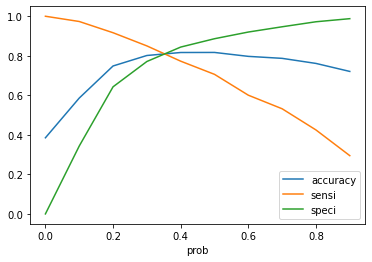

In [370]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [371]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [372]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.196697,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.125746,1012,0,1,1,0,0,0,0,0,0,0,0,0,13
2,0,0.323477,9226,0,1,1,1,1,0,0,0,0,0,0,0,32
3,1,0.865617,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.797752,7987,1,1,1,1,1,1,1,1,1,0,0,1,80


In [373]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8108959219020627


In [374]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3151,  754],
       [ 447, 1999]])

In [375]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [376]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,55.177376,0,0,0,0,0,0,0,1,0,0
1490,0,541.676536,1,0,0,0,0,0,0,0,1,0
7936,0,25.399035,0,0,0,0,0,0,0,1,0,0
4216,0,-1.150329,0,0,1,0,0,0,0,0,0,1
3830,0,57.688803,1,0,0,0,0,0,0,0,0,0


In [377]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    1.000000
1490    1.000000
7936    1.000000
4216    0.753710
3830    1.000000
1800    1.000000
6507    1.000000
4821    1.000000
4223    0.891935
4714    0.264155
dtype: float64